# ARIMA Model with Python

# Dataset
**Minimum Daily Temperatures Dataset**

Use the following dataset that describes the minimum daily temperatures over 10 years (1981-1990) in the city of Melbourne, Australia. The source of the data is credited as the Australian Bureau of Meteorology.
The units are in degrees Celsius and there are 3,650 observations.

Download the dataset here:  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

**Load the dataset and create a line plot of the time series**

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("raw.githubusercontent.com_jbrownlee_Datasets_master_daily-min-temperatures.csv")

In [3]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

<Axes: xlabel='Date', ylabel='Temp'>

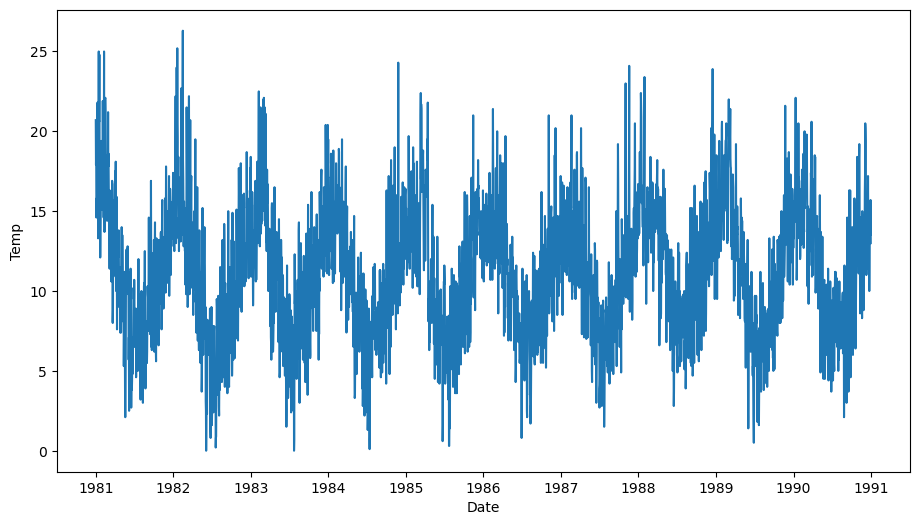

In [7]:
plt.figure(figsize=(11, 6))
sns.lineplot(df, x='Date', y='Temp')

# Split the dataset

Split the dataset into 2 subsets. The first part will be the training dataset that you will use to build an ARIMA model. The second part is the test dataset. It is these time steps that you will treat as out-of-sample.

Write the code to load the dataset, split it into the training and validation datasets, and save them to files *dataset.csv* and *validation.csv* respectively.


**Instructions**

The dataset contains data from January 1st 1981 to December 31st 1990.
Hold back the last 7 days of the dataset from December 1990 as the test dataset and treat those time steps as out of sample.

Specifically 1990-12-25 to 1990-12-31

In [8]:
df_test = df[df["Date"]>= "1990-12-25"]
df_train = df[df["Date"]< "1990-12-25"]
df_test.to_csv('validation.csv', index=False)
df_train.to_csv('dataset.csv', index=False)

# Build the model
Check if the data is stationary. If it is not, make it stationary and develop a simple ARIMA model.

In [9]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

/var/folders/m9/3g_k5s8d6wl58hbz0vy59zkc0000gn/T/ipykernel_3130/2474836567.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_mean = df.rolling(window = 12).mean()
/var/folders/m9/3g_k5s8d6wl58hbz0vy59zkc0000gn/T/ipykernel_3130/2474836567.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_std = df.rolling(window=12).std()


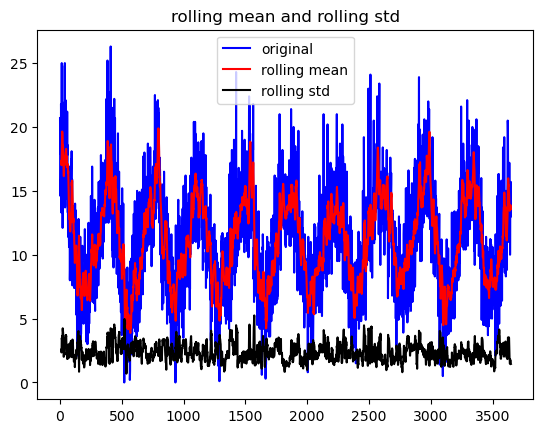

In [10]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window=12).std()

plt.plot(df['Temp'], color= 'blue', label= 'original')
plt.plot(rolling_mean,color = 'red', label = 'rolling mean')
plt.plot(rolling_std,color = 'black', label = 'rolling std')
plt.legend(loc='best')
plt.title('rolling mean and rolling std')
plt.show()

In [11]:
result = adfuller(df['Temp'])

print('ADF Statistic : {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic : -4.444804924611681
p-value: 0.00024708263003611787
Critical Values:
	1%: -3.4321532327220154
	5%: -2.862336767636517
	10%: -2.56719413172842


### Building the actual model

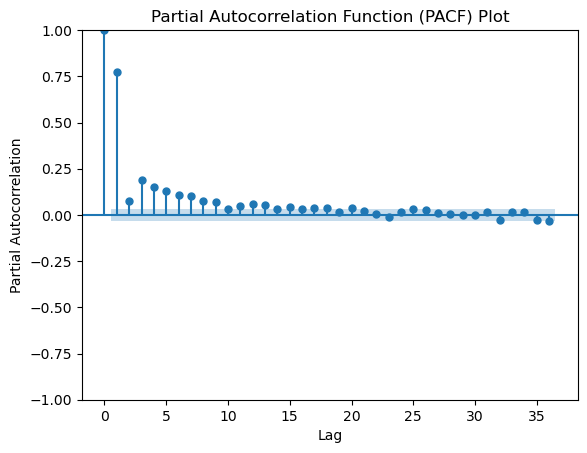

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_train['Temp'])
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.show()


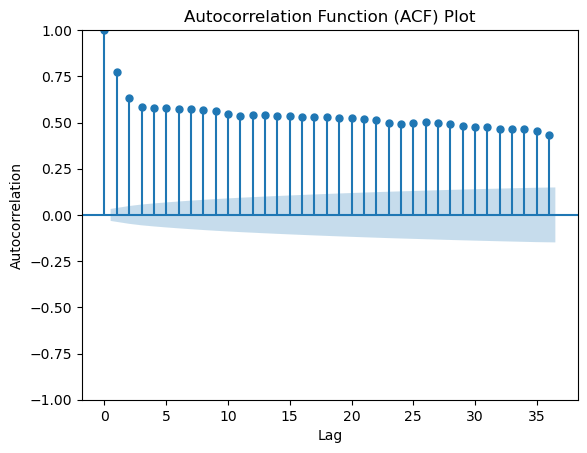

In [22]:
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(df_train['Temp'])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

In [24]:
df_train.set_index('Date', inplace=True)

In [39]:
model = ARIMA(df_train, order=(9,0,1))
results = model.fit()
print(results.summary())

/usr/local/Caskroom/miniconda/base/envs/cours/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/Caskroom/miniconda/base/envs/cours/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/Caskroom/miniconda/base/envs/cours/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/Caskroom/miniconda/base/envs/cours/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood 

                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 3643
Model:                 ARIMA(9, 0, 1)   Log Likelihood               -8369.005
Date:                Wed, 30 Aug 2023   AIC                          16762.010
Time:                        11:06:12   BIC                          16836.416
Sample:                             0   HQIC                         16788.510
                               - 3643                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4548      0.798     14.348      0.000       9.890      13.020
ar.L1          1.4818      0.028     52.072      0.000       1.426       1.538
ar.L2         -0.6190      0.032    -19.440      0.0

#### H1: The time series is stationary.
Upon Dickey-Fuller testing, with a p-value < 0.05 and similar ADFStat and critical values, we can reject the null hypothesis thus concluding that the time series is stationary.

# One-step out-of-sample forecast
A one-step forecast is a forecast of the very next time step in the sequence from the available data used to fit the model.

In this case, we are interested in a one-step forecast of Christmas Day 1990: 1990-12-25

**Instructions**
The statsmodel `ARIMAResults` object provides a `forecast()` function for making predictions.

By default, this function makes a single step out-of-sample forecast. As such, you can call it directly and make your forecast. The result of the `forecast()` function is an array containing the forecast value, the standard error of the forecast, and the confidence interval information. You are only interested in the first element of this forecast.

**Expected result: **
`Forecast: 14.861669`

In [40]:
forecast = results.forecast(steps=1)

/usr/local/Caskroom/miniconda/base/envs/cours/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/Caskroom/miniconda/base/envs/cours/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [41]:
forecast

3643    11.606033
dtype: float64